We will begin by importing the necessary packages.

In [2]:
import sympy
from sympy import symbols, init_printing
import sympy.physics.mechanics as me
init_printing()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We will now create the variables, the velocities, and the constant symbols

In [2]:
# Create the variables
L, theta = me.dynamicsymbols('L theta')

# Create the velocities
L_dot, theta_dot = me.dynamicsymbols('L_dot theta_dot')

# Create the constants
m, k, g, t, L_0 = sympy.symbols('m k g t L_0')

In [3]:
# Create the world frame
A = me.ReferenceFrame('A')

# Create the pendulum frame
B = B.orientnew('A', 'axis', [theta, -A.z])

# Set the rotation of the pendulum frame
B.set_ang_vel(A, theta_dot * A.z)

In [4]:
# Create the Origin
O = me.Point('O')

# Create the mass point
P = O.locatenew('P', L * A.y)

In [5]:
# Set origin velocity to zero
O.set_vel(A, 0)

# Create the velocity of the mass point
G.set_vel(A, -L_dot * A.y)
G.v1pt_theory(O, N, A)

     d       
L(t)⋅──(θ(t))
     dt       a_x - L_dot(t) a_y

In [7]:
pendulum = me.Particle('pend', G, m)

def K(L1):
    k = 100
    L = 0.12
    return k * (L1 >= L)

In [8]:
# Create damping forces for spring and rotation
damping = L_dot * c * A.y
spring = K(L) * (L-L_0) * A.y
gravity = -m * g * N.y
forces = damping + spring + gravity
forces

(c⋅L_dot(t) + 100⋅(-L₀ + L(t))⋅(L(t) ≥ 0.12)) a_y - g⋅m n_y

In [9]:
kane = me.KanesMethod(N, q_ind=[L, theta], u_ind=[L_dot, theta_dot], kd_eqs=[L_dot - L.diff(t),
                                                                             theta_dot - theta.diff(t)])

In [10]:
fr, frstar = kane.kanes_equations([(G, forces)], [pendulum])
# fr, frstar

In [11]:
M = kane.mass_matrix_full
f = kane.forcing_full
# M, f

In [12]:
# M.inv() * f

In [13]:
from pydy.system import System

In [14]:
sys = System(kane)

In [15]:
sys.constants = {m:1.0,
                 g:9.8,
                 c:0.0,
#                  k:100.0,
                 L_0:0.4}
sys.initial_conditions = {L:0.05, theta:1.39626}

In [16]:
from numpy import linspace
sys.times = linspace(0.0, 6.0, 1000)

In [17]:
resp = sys.integrate()

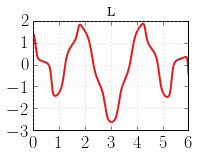

In [18]:
sim_time = np.linspace(0.0, 6.0, 1000)

fig = plt.figure(0)
fig.add_subplot(221)
plt.plot(sim_time, resp[:,1], label='Unshaped')
# plt.ylim(25,0)
plt.title(r'L')

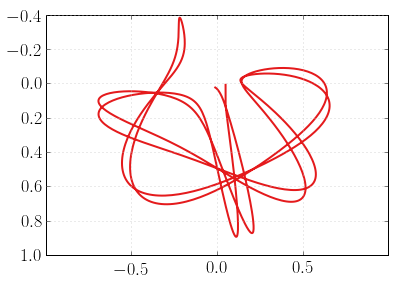

In [19]:
plt.plot(resp[:,0]*np.sin(resp[:,1]), resp[:,0]*np.cos(resp[:,1]), label='Unshaped')
plt.gca().invert_yaxis()
plt.axes().set_aspect('equal', 'datalim')

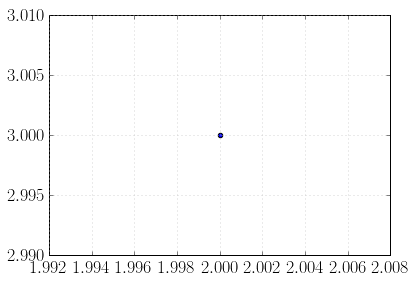

In [20]:
plt.scatter(2,3)

NameError: name 'trace' is not defined

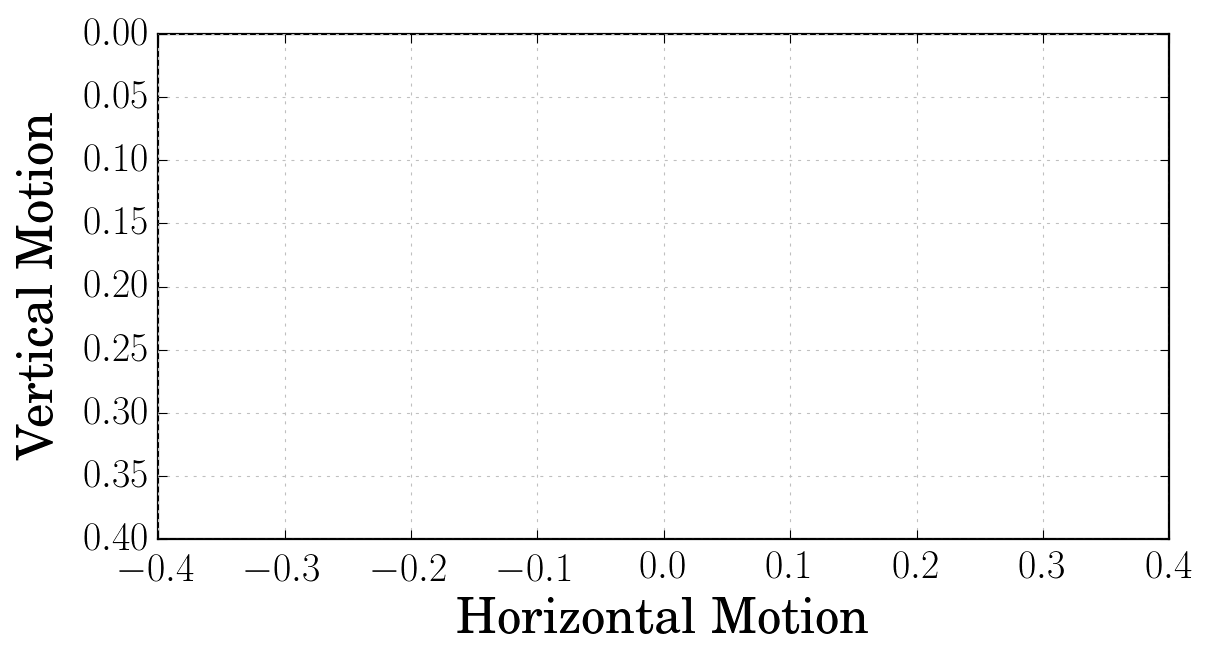

In [21]:
x=resp[:,0]*np.sin(resp[:,1])
y=resp[:,0]*np.cos(resp[:,1])

import matplotlib.animation as animation

# Change some plot properties to make the video work and look better
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Circle
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['savefig.bbox'] = 'standard'
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot(111, aspect='equal')
# plt.gca().invert_yaxis()
plt.ylim(0.4,0)
plt.xlim(-0.4,0.4)
plt.xlabel('Horizontal Motion', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Vertical Motion', fontsize=22, weight='bold', labelpad=10)

spring, = plt.plot([],[], linewidth=2, linestyle = '-', label='leftcable', color='b')
patch = plt.Circle((0, 0), 0.01)

def init():
    """ Initialize the lines in the plot """
    spring.set_data([], [])
    trace.set_data([], [])
    patch.center = (0, 0)
    ax.add_patch(patch)
    return patch, spring,

def animate_un(i):
    """ Update the plot for frame i """
    if not (i % 30): # print notice every 30th frame
        print('Processing frame {}'.format(i))

    spring.set_data([0, x[i]], [0, y[i]])
    patch.center=([x[i], y[i]])

    return spring, patch,

ani = animation.FuncAnimation(fig, animate_un, interval = 30, frames = 300,
                                 blit = True, init_func = init)

ani.save('/Users/forrest/Desktop/pendulumno.mp4', bitrate = 2500, fps = 30)